In [41]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

housing = pd.read_csv("housing.csv")
housing.head(10)

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY
5    -122.25     37.85  ...            269700.0         NEAR BAY
6    -122.25     37.84  ...            299200.0         NEAR BAY
7    -122.25     37.84  ...            241400.0         NEAR BAY
8    -122.26     37.84  ...            226700.0         NEAR BAY
9    -122.25     37.84  ...            261100.0         NEAR BAY

[10 rows x 10 columns]

In [42]:
type(housing)

pandas.core.frame.DataFrame

column: longitude


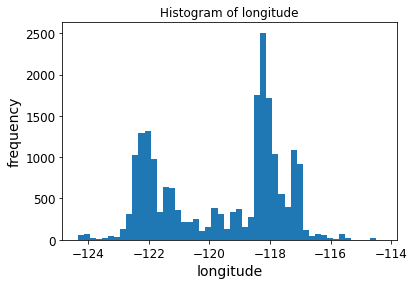

column: latitude


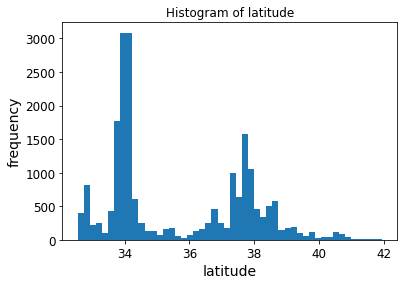

column: housing_median_age


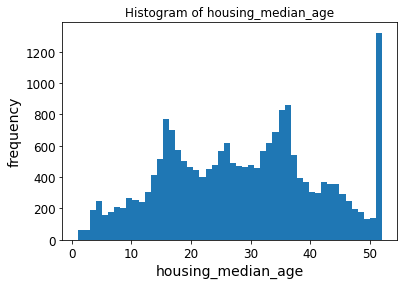

column: total_rooms


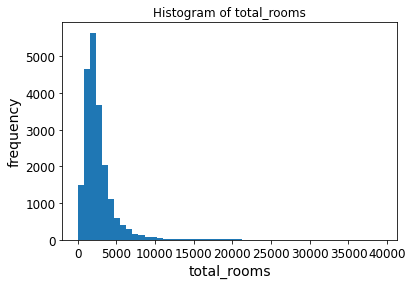

column: population


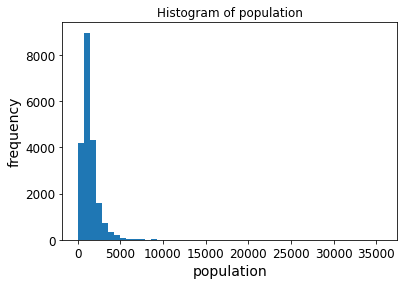

column: median_income


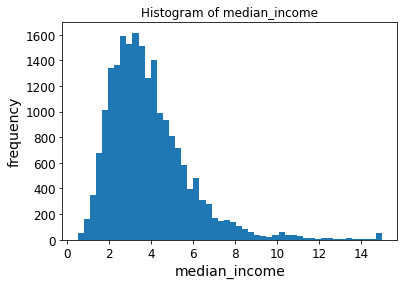

column: median_house_value


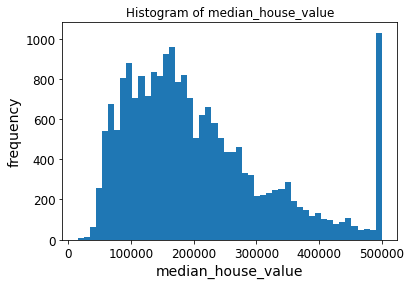

In [43]:
def plot_histogram(df,col):
  bins=50
  col_list = list(housing)
  col_list.remove('ocean_proximity')
  print("column: "+col)
  plt.hist(housing[col],bins=bins)
  plt.title("Histogram of "+col)
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()
plot_histogram(housing,"longitude")
plot_histogram(housing,"latitude")
plot_histogram(housing,"housing_median_age")
plot_histogram(housing,"total_rooms")
# plot_histogram(housing,"total_bedrooms")
plot_histogram(housing,"population")
plot_histogram(housing,"median_income")
plot_histogram(housing,"median_house_value")


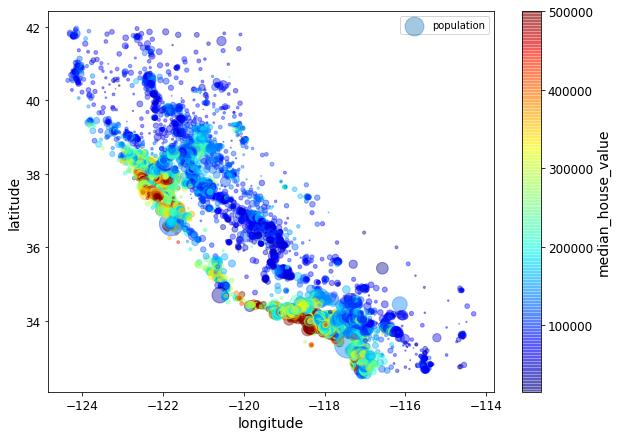

In [44]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12


housing.plot(kind = "scatter",x = "longitude", y = "latitude",alpha=0.4,
             s = housing['population']/50,label='population',figsize=(10,7),
             c ="median_house_value", cmap = plt.get_cmap("jet"),colorbar=True, sharex=False)
plt.legend();

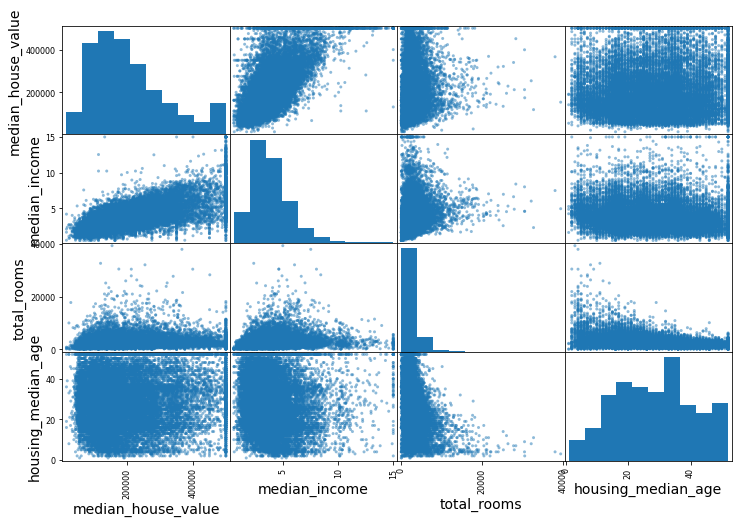

In [45]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8));

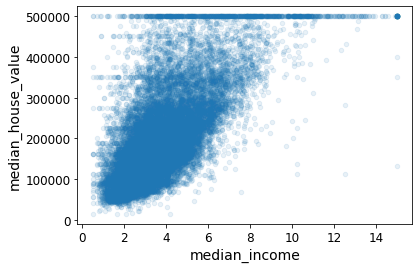

In [46]:
housing.plot(kind='scatter',x='median_income',y='median_house_value', alpha=0.1);

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [49]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
del housing['total_rooms'], housing['total_bedrooms']

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   population           20640 non-null  float64
 4   households           20640 non-null  float64
 5   median_income        20640 non-null  float64
 6   median_house_value   20640 non-null  float64
 7   ocean_proximity      20640 non-null  object 
 8   rooms_per_household  20640 non-null  float64
 9   bedrooms_per_room    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

col_list = list(housing)
col_list.remove('ocean_proximity')
col_list.remove('median_house_value')

housing_numeric = housing[col_list]
housing_scaled  =scaler.fit_transform(housing_numeric)

housing_scaled_df = pd.DataFrame(housing_scaled,index = housing_numeric.index, columns = housing_numeric.columns)

housing = pd.concat([housing_scaled_df, housing['median_house_value'], housing['ocean_proximity']],axis=1)
housing.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0  -1.327835  1.052548  ...            452600.0         NEAR BAY
1  -1.322844  1.043185  ...            358500.0         NEAR BAY
2  -1.332827  1.038503  ...            352100.0         NEAR BAY
3  -1.337818  1.038503  ...            341300.0         NEAR BAY
4  -1.337818  1.038503  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

In [52]:
housing = pd.get_dummies(housing)
housing.tail(10)

longitude  ...  ocean_proximity_NEAR OCEAN
20630  -0.873626  ...                           0
20631  -0.913557  ...                           0
20632  -0.938513  ...                           0
20633  -0.978444  ...                           0
20634  -0.993418  ...                           0
20635  -0.758826  ...                           0
20636  -0.818722  ...                           0
20637  -0.823713  ...                           0
20638  -0.873626  ...                           0
20639  -0.833696  ...                           0

[10 rows x 14 columns]

In [53]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)

print("# of train_set : %.0f, # of test_set : %.0f" %(train_set.shape[0],test_set.shape[0]))

# of train_set : 16512, # of test_set : 4128


In [54]:
train_set_features = train_set.drop("median_house_value",axis=1)
train_set_target = train_set['median_house_value'].copy()